In [2]:
%pylab inline
import pandas as pd
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


### Load the data

In [3]:
data = pd.read_csv("../review_sentences_final_challenge_service_words_NEW_sen_proba.csv", index_col = 0)
data = data.drop(['type', 'user_id', 'votes', 'proba_good', 'clean'], axis=1)
#data.date = pd.to_datetime(data.date)
data.head(3)

,business_id,date,review_id,stars,text,senpred,proba_bad
0,4bEjOyTaDG24SY5TxsaUNQ,2005-10-10,qYJV5kIViwer1P1Cb2OSfw,5,As the restaurant is directly across from the ...,1,0.022823
1,4bEjOyTaDG24SY5TxsaUNQ,2005-10-10,qYJV5kIViwer1P1Cb2OSfw,5,"We had excellent service..polite, prompt, help...",1,0.003209
2,4bEjOyTaDG24SY5TxsaUNQ,2005-10-10,qYJV5kIViwer1P1Cb2OSfw,5,"And by the way, the wait staff aren't above ...",1,0.380908


In [4]:
print data.shape
data.tail(1)

(646123, 7)


,business_id,date,review_id,stars,text,senpred,proba_bad
646122,CvufqyRBbS2Ed2wQlAXCMw,2015-01-04,4sCMhEMx0fSo5XsQ1tXGvQ,5,"Our awesome server Mobin, recommended the Bang...",1,0.003816


### Select reviews from 2014

In [5]:
year = []
for i in range(len(data)):
    if data.iloc[i].date[:4] == '2014':
        year.append(i)

print len(data), len(year)

646123 189166


In [6]:
data2014all = data.loc[year]
print len(data2014all)

189166


In [7]:
data2014all.date = pd.to_datetime(data2014all.date)
data2014all = data2014all.sort(['business_id', 'date'])
data2014all = data2014all.reset_index(drop=True)
data2014all.tail(1)

,business_id,date,review_id,stars,text,senpred,proba_bad
189165,zxqvU415r_RtZRKDtdbIKQ,2014-12-31,3-GFVOlM6YjVuCgSJNz5fw,2,Someone is not watching the kitchen and thus t...,0,0.877595


In [8]:
data2014all.to_csv('data2014all.csv')

<h1> Load it back.  Can start here next time, if need to.</h1>

In [1]:
%pylab inline
import pandas as pd
from __future__ import division

data2014all = pd.read_csv("data2014all.csv", index_col = 0)
data2014all.date = pd.to_datetime(data2014all.date)
data2014all.tail(1)

Populating the interactive namespace from numpy and matplotlib


,business_id,date,review_id,stars,text,senpred,proba_bad
189165,zxqvU415r_RtZRKDtdbIKQ,2014-12-31,3-GFVOlM6YjVuCgSJNz5fw,2,Someone is not watching the kitchen and thus t...,0,0.877595


<h2>Select sentences with >90% prediction for good or bad.</h2>
(>90% good is same as <10% bad)

In [2]:
data2014 = data2014all[(data2014all.proba_bad<0.1) | (data2014all.proba_bad>0.9)]
len(data2014), len(data2014all), len(data2014)/len(data2014all)*100

(60285, 189166, 31.868834780034465)

### Find the restaurants worth plotting based on number of bad service sentences, number of service sentences and percentage of bad service sentences

In [3]:
data2014_bad = data2014[(data2014.proba_bad>0.9)]
data2014_good = data2014[(data2014.proba_bad<0.1)]
print len(data2014_bad), len(data2014_good)

31740 28545


In [4]:
badservice = data2014_bad.groupby(data2014_bad.business_id).count().sort('date',ascending=0)

service_data_90 = pd.DataFrame({'business_id': badservice.index.values, 
                                'number of bad service sentences >90%': badservice.date.values})


allservice = data2014.groupby(data2014.business_id).count().sort('date',ascending=0)
service_data_90_2 = pd.DataFrame({'business_id': allservice.index.values, 
                                'number of service sentences': allservice.date.values})
all_service_data_90 = pd.merge(service_data_90, service_data_90_2)
all_service_data_90['percentage of bad service sentences'] = all_service_data_90[all_service_data_90.columns[1]]/all_service_data_90[all_service_data_90.columns[2]]*100
all_service_data_90 = all_service_data_90.sort([all_service_data_90.columns[2]],ascending=0).reset_index(drop=True)

In [5]:
#Trim to restaurants with only x num of understood service sentences.
reqd_service_sentence_number_per_year = 200

trim_list = all_service_data_90[all_service_data_90['number of service sentences']>= reqd_service_sentence_number_per_year]
trim_list

,business_id,number of bad service sentences >90%,number of service sentences,percentage of bad service sentences
0,aGbjLWzcrnEx2ZmMCFm3EA,272,454,59.911894
1,s5-VDvUqyYnD8RG3LPqnbQ,193,330,58.484848
2,4bEjOyTaDG24SY5TxsaUNQ,126,324,38.888889
3,sIyHTizqAiGu12XMLX3N3g,196,287,68.292683
4,mDdqifuTrfXAOfxiLMGu5Q,136,273,49.816850
5,RhbOa-Ft3sZB4B_1j5LfyA,40,258,15.503876
6,Xhg93cMdemu5pAMkDoEdtQ,213,255,83.529412
7,ateowLnq6kpgNNWHzCDByQ,130,248,52.419355
8,QbmcCE_cLq4WO8ZMKImaLw,122,216,56.481481


In [6]:
#Now pare down the sentences to only include the ones from that list.
bizz = list(trim_list.business_id)
bizz

['aGbjLWzcrnEx2ZmMCFm3EA',
 's5-VDvUqyYnD8RG3LPqnbQ',
 '4bEjOyTaDG24SY5TxsaUNQ',
 'sIyHTizqAiGu12XMLX3N3g',
 'mDdqifuTrfXAOfxiLMGu5Q',
 'RhbOa-Ft3sZB4B_1j5LfyA',
 'Xhg93cMdemu5pAMkDoEdtQ',
 'ateowLnq6kpgNNWHzCDByQ',
 'QbmcCE_cLq4WO8ZMKImaLw']

### Let's check out the first restaurant in the list

In [7]:
badservicebusiness = all_service_data_90.business_id.values
singlerestaurant_90 = data2014[data2014.business_id == badservicebusiness[0]]
singlerestaurant_90.set_index('date', inplace=True)
singlerestaurant_90['senpred'].resample('M', how='count')

date
2014-01-31    51
2014-02-28    27
2014-03-31    22
2014-04-30    33
2014-05-31    43
2014-06-30    46
2014-07-31    58
2014-08-31    42
2014-09-30    36
2014-10-31    29
2014-11-30    37
2014-12-31    30
Freq: M, Name: senpred, dtype: int64

In [8]:
def organizeResto(biznum):
    badservicebusiness = all_service_data_90.business_id.values
    singlerestaurant = data2014[data2014.business_id == badservicebusiness[biznum]]
    singlerestaurant.set_index('date', inplace=True)
    singlerestaurant['senpred'].resample('M', how='count')
    return singlerestaurant

def graphNegSent(biznum, plot = False):
    singleresto = organizeResto(biznum)
    goat = singleresto['senpred'].resample('M', how='mean')
    goat.name = 'senpred_'+str(biznum+1)
    if plot:
        fig=pd.DataFrame(goat).plot()
        fig.set_title('Negative Sentiment for Business '+str(biznum))
        fig.set_xlabel('Date')
        fig.set_ylabel('Score')
    return goat
    #savefig('Bus1.png', bbox_inches='tight')
    
ghost = {}
ghostlist = []
    
for i in range(len(bizz)):
    rnd=graphNegSent(i)
    ghost[i+1]=rnd
    ghostlist.append(rnd)
    
#graphNegSent(0).to_csv('rest0graph.csv')
#graphNegSent(1).to_csv('rest1graph.csv')

In [9]:
print ghostlist[0]

date
2014-01-31    0.196078
2014-02-28    0.555556
2014-03-31    0.681818
2014-04-30    0.424242
2014-05-31    0.372093
2014-06-30    0.304348
2014-07-31    0.396552
2014-08-31    0.404762
2014-09-30    0.527778
2014-10-31    0.344828
2014-11-30    0.567568
2014-12-31    0.266667
Freq: M, Name: senpred_1, dtype: float64


In [10]:
ghostdf = pd.DataFrame(ghostlist).transpose()
ghostdf

,senpred_1,senpred_2,senpred_3,senpred_4,senpred_5,senpred_6,senpred_7,senpred_8,senpred_9
date,,,,,,,,,
2014-01-31,0.196078,NaN,0.641026,0.280000,0.545455,0.894737,0.214286,NaN,0.523810
2014-02-28,0.555556,NaN,0.764706,0.285714,0.588235,0.800000,0.285714,NaN,0.307692
2014-03-31,0.681818,NaN,0.481481,0.380952,0.500000,0.937500,0.120000,NaN,0.315789
2014-04-30,0.424242,NaN,0.611111,0.291667,0.421053,0.916667,0.363636,0.562500,0.400000
2014-05-31,0.372093,NaN,0.555556,0.529412,0.736842,0.863636,0.115385,0.545455,0.500000
2014-06-30,0.304348,0.645161,0.695652,0.387097,0.310345,0.863636,0.133333,0.361111,0.444444
2014-07-31,0.396552,0.637931,0.617647,0.421053,0.555556,0.833333,0.189189,0.500000,0.318182
2014-08-31,0.404762,0.446429,0.647059,0.296296,0.444444,0.750000,0.076923,0.500000,0.409091
2014-09-30,0.527778,0.265306,0.615385,0.347826,0.384615,0.789474,0.117647,0.416667,0.500000


In [11]:
ghostdf.index = ghostdf.index.to_period('M').to_timestamp('M')

In [12]:
#D3 seems to graph them in a way that it's better to set to beginning of the month.

monthlist = []
for i in ghostdf.index:
    monthlist.append(datetime.datetime(i.year, i.month, 1))

ghostdf.index = monthlist
ghostdf.index.name = "date"

ghostdf

,senpred_1,senpred_2,senpred_3,senpred_4,senpred_5,senpred_6,senpred_7,senpred_8,senpred_9
date,,,,,,,,,
2014-01-01,0.196078,NaN,0.641026,0.280000,0.545455,0.894737,0.214286,NaN,0.523810
2014-02-01,0.555556,NaN,0.764706,0.285714,0.588235,0.800000,0.285714,NaN,0.307692
2014-03-01,0.681818,NaN,0.481481,0.380952,0.500000,0.937500,0.120000,NaN,0.315789
2014-04-01,0.424242,NaN,0.611111,0.291667,0.421053,0.916667,0.363636,0.562500,0.400000
2014-05-01,0.372093,NaN,0.555556,0.529412,0.736842,0.863636,0.115385,0.545455,0.500000
2014-06-01,0.304348,0.645161,0.695652,0.387097,0.310345,0.863636,0.133333,0.361111,0.444444
2014-07-01,0.396552,0.637931,0.617647,0.421053,0.555556,0.833333,0.189189,0.500000,0.318182
2014-08-01,0.404762,0.446429,0.647059,0.296296,0.444444,0.750000,0.076923,0.500000,0.409091
2014-09-01,0.527778,0.265306,0.615385,0.347826,0.384615,0.789474,0.117647,0.416667,0.500000


In [69]:
ghostdf.to_csv('top9senpred.csv')

In [15]:
senpredDF = pd.read_csv('top9senpred.csv')
senpredDF

,date,senpred_1,senpred_2,senpred_3,senpred_4,senpred_5,senpred_6,senpred_7,senpred_8,senpred_9
0,2014-01-01,0.196078,NaN,0.641026,0.280000,0.545455,0.894737,0.214286,NaN,0.523810
1,2014-02-01,0.555556,NaN,0.764706,0.285714,0.588235,0.800000,0.285714,NaN,0.307692
2,2014-03-01,0.681818,NaN,0.481481,0.380952,0.500000,0.937500,0.120000,NaN,0.315789
3,2014-04-01,0.424242,NaN,0.611111,0.291667,0.421053,0.916667,0.363636,0.562500,0.400000
4,2014-05-01,0.372093,NaN,0.555556,0.529412,0.736842,0.863636,0.115385,0.545455,0.500000
5,2014-06-01,0.304348,0.645161,0.695652,0.387097,0.310345,0.863636,0.133333,0.361111,0.444444
6,2014-07-01,0.396552,0.637931,0.617647,0.421053,0.555556,0.833333,0.189189,0.500000,0.318182
7,2014-08-01,0.404762,0.446429,0.647059,0.296296,0.444444,0.750000,0.076923,0.500000,0.409091
8,2014-09-01,0.527778,0.265306,0.615385,0.347826,0.384615,0.789474,0.117647,0.416667,0.500000
9,2014-10-01,0.344828,0.313725,0.678571,0.125000,0.571429,0.833333,0.055556,0.526316,0.437500


In [18]:
sr90 = data2014[data2014.business_id == badservicebusiness[0]].reset_index(drop=True)

In [20]:
bizz

['aGbjLWzcrnEx2ZmMCFm3EA',
 's5-VDvUqyYnD8RG3LPqnbQ',
 '4bEjOyTaDG24SY5TxsaUNQ',
 'sIyHTizqAiGu12XMLX3N3g',
 'mDdqifuTrfXAOfxiLMGu5Q',
 'RhbOa-Ft3sZB4B_1j5LfyA',
 'Xhg93cMdemu5pAMkDoEdtQ',
 'ateowLnq6kpgNNWHzCDByQ',
 'QbmcCE_cLq4WO8ZMKImaLw']

###Gather the Important Sentences!

In [78]:
important_sentences = ""

for i, item in enumerate(bizz):
    latest = data2014[data2014.business_id == item].reset_index(drop=True)
    latest['rest_num'] = i+1
    print "Restaurant %s has %i important sentences" %(i+1, len(latest))
    if len(important_sentences) == 0:
        important_sentences = latest
    else:
        important_sentences = important_sentences.append(latest, ignore_index=True)

print
print len(important_sentences),
print "total important sentences picked out."

Restaurant 1 has 454 important sentences
Restaurant 2 has 330 important sentences
Restaurant 3 has 324 important sentences
Restaurant 4 has 287 important sentences
Restaurant 5 has 273 important sentences
Restaurant 6 has 258 important sentences
Restaurant 7 has 255 important sentences
Restaurant 8 has 248 important sentences
Restaurant 9 has 216 important sentences

2645 total important sentences picked out.


In [79]:
important_sentences

,business_id,date,review_id,stars,text,senpred,proba_bad,rest_num
0,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-01,CCKcUuM09u7qQqSCn0Rg1w,4,The service is decent.,0,9.047268e-01,1
1,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-01,-hgWbzLk1JSk6RxbPywxhw,4,I only give four stars because the service was...,0,9.576371e-01,1
2,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-01,-hgWbzLk1JSk6RxbPywxhw,4,It took 10 minutes for us to even see our wait...,0,9.887497e-01,1
3,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-03,TGapNq4BC-GJfh2NHh_LGQ,1,My service was horrible!,0,9.543335e-01,1
4,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-04,uL-i5z-pXcAAZJq74CNAvA,2,An hour and ten minutes later we tried to chec...,0,9.900894e-01,1
5,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-04,uL-i5z-pXcAAZJq74CNAvA,2,"Now, the food runner was extremely rude to my ...",0,9.487207e-01,1
6,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-04,M7uoYnq8u7acHhBEL91OHw,1,"We waited and waited, we saw others seated aft...",0,9.236697e-01,1
7,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-04,M7uoYnq8u7acHhBEL91OHw,1,My husband was watching the waitress we had an...,0,9.963041e-01,1
8,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-04,M7uoYnq8u7acHhBEL91OHw,1,When our meal finally came the food was indeed...,0,9.929697e-01,1
9,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-04,M7uoYnq8u7acHhBEL91OHw,1,There was no offer to comp the bill or apologi...,0,9.598293e-01,1


In [80]:
important_sentences.to_csv("important_sentences.csv")

In [104]:
#Reload
imp_sens = pd.read_csv("important_sentences.csv", index_col = 0)
imp_sens.date = pd.to_datetime(imp_sens.date)

In [105]:
imp_sens.head(2)

,business_id,date,review_id,stars,text,senpred,proba_bad,rest_num
0,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-01,CCKcUuM09u7qQqSCn0Rg1w,4,The service is decent.,0,0.904727,1
1,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-01,-hgWbzLk1JSk6RxbPywxhw,4,I only give four stars because the service was...,0,0.957637,1


In [127]:
sr90text = imp_sens[(imp_sens.date >= pd.datetime(2014, 4, 1))  & (imp_sens.date < pd.datetime(2014, 5, 1)) & (imp_sens.rest_num ==3)]

In [129]:
sr90text.text.values

array([ "My husband and I went here on a Saturday night with no reservations and figured we'd have to wait at least an hour as walk-in's... but the host told us we could score an outdoor patio table in 45 minutes.",
       'We were seated outside on the patio, which had a great view of the Bellagio across the street and the great water shows.',
       'Awesome servers here kept our coffee and waters full, brought me my yummy mimosa, and got our orders quickly.',
       'It is so good, I had the server write down the Web site for me so I could order a couple bags.',
       'Escargot done right, salads, bread, steaks, seafood and perfect service.',
       'Excellent customer service & the patio area is what makes this spot a great restaurant experience.',
       'We had a great anniversary lunch thanks to this wonderful restaurant and Daniel our server was professionally courteous.',
       'We were seated quickly because we ate inside and the caesar salad and baguette were very good.',


In [132]:
imp_sens.head(1)


,business_id,date,review_id,stars,text,senpred,proba_bad,rest_num
0,aGbjLWzcrnEx2ZmMCFm3EA,2014-01-01,CCKcUuM09u7qQqSCn0Rg1w,4,The service is decent.,0,0.904727,1


In [164]:
def load_sentences():
    sens = pd.read_csv('important_sentences.csv', index_col = 0)
    sens.drop(['business_id', 'review_id', 'stars', 'proba_bad'], axis = 1, inplace = True)
    sens.date = pd.to_datetime(sens.date)
    return sens

def sentences_resto_month(resto, month = 0, year = 2014):
    sens = impsens[impsens.rest_num == resto]
    if month > 0:
        monthstart = pd.to_datetime(year,month,1)
        sens = sens[(sens.date >= monthstart)  & (sens.date < (monthstart + relativedelta(months=1)))]
    return sens.reset_index(inplace = True)

impsens = load_sentences()
sentences_resto_month(1)

In [217]:
def load_sentences():
    sens = pd.read_csv('important_sentences.csv', index_col = 0)
    sens.drop(['business_id', 'review_id', 'stars', 'proba_bad'], axis = 1, inplace = True)
    sens.date = pd.to_datetime(sens.date)
    return sens

def sentences_resto_month(resto, month = 0, year = 2014):
    sens = impsens[impsens.rest_num == resto]
    if month > 0:
        monthstart = pd.datetime(year,month,1)
        sens = sens[(sens.date >= monthstart) & (sens.date < (monthstart + relativedelta(months=1)))]
    return sens.reset_index(drop=True)

impsens = load_sentences()
cat = sentences_resto_month(2,8)

In [213]:
impsens.tail(2)

,date,text,senpred,rest_num
2643,2014-12-26,Awesome food and awesome service.,1,9
2644,2014-12-27,This place gets two stars from me for being op...,0,9


In [218]:
cat

,date,text,senpred,rest_num
0,2014-08-01,From the ambiance to the view to the wait staf...,1,2
1,2014-08-02,"I am gluten free, so the knowledge the server ...",1,2
2,2014-08-04,Chicken sucked none of us (4 of us) liked it b...,0,2
3,2014-08-05,"Five stars on food, service, and drinks.",1,2
4,2014-08-06,"The staff were quite knowledgable, and the man...",0,2
5,2014-08-07,"Throughout the dining room, servers stood at a...",0,2
6,2014-08-07,"NUTSHELL\nDespite the high price tag, I would ...",0,2
7,2014-08-07,But once again - wait staff carried the day - ...,1,2
8,2014-08-08,A true artist in love with his craft is always...,1,2
9,2014-08-08,The entire bar staff offered great service and...,1,2


In [23]:
# find out the bad service sentences for Dec
singlerestaurant_90 = data_oneyear_90[data_oneyear_90.business_id == badservicebusiness[0]].reset_index(drop=True)
sr90text = singlerestaurant_90.text[(singlerestaurant_90['date'] >= pd.datetime(2014, 12, 1)) & 
                    (singlerestaurant_90['date'] <= pd.datetime(2014, 12, 30)) &
                    (singlerestaurant_90['senpred'] == 0)].reset_index(drop=True)
sr90text.values

array(['It took forever to get seated after the hour mark.',
       "Once you're inside, the service doesn't take too long at all, it's just a matter of getting a table.",
       'My water and beverage glass was never empty, my husband would order a beer and it would arrive two minutes later, the plates were quickly cleared, all in an unobtrusive way.',
       'Asked for a set of cutlery and the waiter forgot.',
       'Asked for extra bacon for my burger and either the kitchen forgot or the waiter did not write it down.',
       "Our waitress seemed nice but it was impossible to hear her even though the restaurant wasn't very loud.",
       'Onions rings - good crunch but very greasy\nJalapeno poppers - probably the best thing we had, but I\'m pretty sure they forgot our "fiery surprise"\nFrench fries - decent, but could have used more salt and longer cook time\n\nI had the American burger because I was not feeling very adventurous and I figured it would be the hardest one to screw up

In [24]:
#find out the good service sentences for March
sr90text = singlerestaurant_90.text[(singlerestaurant_90['date'] >= pd.datetime(2014, 3, 1)) & 
                    (singlerestaurant_90['date'] <= pd.datetime(2014, 3, 31)) &
                    (singlerestaurant_90['senpred'] == 1)].reset_index(drop=True)
sr90text.values

array(['We waited about 40 min but it was well worth it.',
       'My farm burger (duck breast bacon, sharp English cheddar, and fried egg) was cooked perfectly and the service was good as well.',
       "This is place is definitely worth the 15-20 minutes it takes to get seated, trust me you won't be disappointed.",
       'The prices were reasonable for the gourmet quality style and the service was friendly and fun.',
       "Burgers - Per our server's recommendation, I had the Farm burger (duck bacon, cheddar, fried egg) and it was amazing.",
       'Great waitstaff, prompt, courteous and all the recommendations were spot on.',
       "farm burger amazing got coffee shake...heaven in a glass, there was a mix up with our appetizer didn't come til after the  burgers,  manager was right at our table comped the apps!",
       'I always grab a pen at the end-- one more touch I love (twice our waitress brought more pens for us)',
       'I was seated straight away at the bar - this could 

In [26]:
#name of restaurant
names = pd.read_csv('../business_final.csv')
names[names['business_id']==badservicebusiness[0]]

,Unnamed: 0,business_id,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
1266,1266,aGbjLWzcrnEx2ZmMCFm3EA,"{u'Take-out': True, u'Accepts Credit Cards': T...","[Burgers, Restaurants]",Las Vegas,Planet Hollywood Las Vegas Resort & Casino\n36...,"{u'Monday': {u'close': u'00:00', u'open': u'11...",36.110108,-115.172338,Gordon Ramsay BurGR,[The Strip],True,2537,4,NV,business


### Let's try plotting another restaurant

In [130]:
singlerestaurant_90 = data_oneyear_90[data_oneyear_90.business_id == badservicebusiness[1]]
singlerestaurant_90.set_index('date', inplace=True)
singlerestaurant_90['senpred'].resample('M', how='count')

date
2014-06-30    31
2014-07-31    58
2014-08-31    56
2014-09-30    49
2014-10-31    51
2014-11-30    47
2014-12-31    38
2015-01-31    22
Freq: M, Name: senpred, dtype: int64

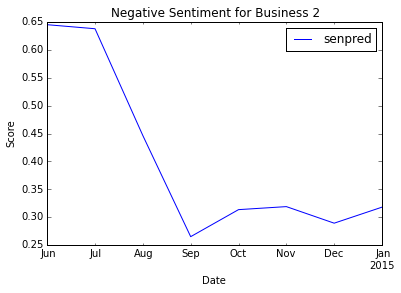

In [131]:
testplot1 = pd.DataFrame(singlerestaurant_90['senpred'].resample('M', how='mean'))
fig=testplot1.plot()
fig.set_title('Negative Sentiment for Business 2')

fig.set_xlabel('Date')
fig.set_ylabel('Score')
savefig('Bus2.png', bbox_inches='tight')

In [132]:
# find out the bad service sentences for Sep
singlerestaurant_90 = data_oneyear_90[data_oneyear_90.business_id == badservicebusiness[1]].reset_index(drop=True)
sr90text = singlerestaurant_90.text[(singlerestaurant_90['date'] >= pd.datetime(2014, 9, 1)) & 
                    (singlerestaurant_90['date'] <= pd.datetime(2014, 9, 30)) &
                    (singlerestaurant_90['senpred'] == 0)].reset_index(drop=True)
sr90text.values

array(['I was really disappointed with the service tonight....',
       'Lunch service took 2 hours (and the restaurant was not busy).',
       'However, dinner service was equally as disappointing as lunch.',
       'It took over 10 mins for a waiter to touch the table , it took about the same time to get the wine order delivered to us too.',
       "Maybe one of the reasons it's hard to get into is the service is so slow so there's no tables turning !",
       'To summarize the food we had was great the service and waitress we had was terrible to say the least.',
       'Unfortunately the lounge menu had no vegan options, when asking the waitress for possible options without dairy she suggested ONE appetizer and was not knowledgable at all.',
       'Our waitress finally came back 10 minutes later and did not give us any information on the non dairy items nor did she bring over any bread.',
       'The waitress did not even try and stop us from leaving or ask kitchen staff for recomm

In [133]:
# find out the good service sentences for July
sr90text = singlerestaurant_90.text[(singlerestaurant_90['date'] >= pd.datetime(2014, 7, 1)) & 
                    (singlerestaurant_90['date'] <= pd.datetime(2014, 7, 31)) &
                    (singlerestaurant_90['senpred'] == 1)].reset_index(drop=True)
sr90text.values

array(['Knowledgable, friendly, and made the best recommendations.',
       'Exquisite decor: elegant yet warm and inviting\nAntipasti presentation fresh and mouth watering\nService amazing: professional yet warm and knowledgeable:\nKudos to Jason, server Bart, back server,Theresa, sommelier and Avi, manager\nWe were on a budget and told Theresa what our price limits were: she brought us a Northern Italian Pinot Grigio which was crisp, buttery and dry...Fabulous...especially for the price\nThe food presentation was attractive and loaded with taste\nThe antipasti was an interesting combo: each item with a distinctive taste\nPastas were TENDER...with simple delicious sauces\nEVERYTHING LIGHT...and FLAVORFUL !!!!!!!',
       'Our server was amazing.',
       'The place was full, but we were seated immediately upon arriving for our 7:45 reservation.',
       'The bread service is excellent, with crunchy breadsticks, a flatbread, and a life-changing rosemary focaccia.',
       'My favorite 

In [134]:
#name of restaurant
names[names['business_id']==badservicebusiness[1]]

,Unnamed: 0,business_id,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
1322,1322,s5-VDvUqyYnD8RG3LPqnbQ,"{u'Take-out': False, u'Accepts Credit Cards': ...","[Restaurants, Italian]",Las Vegas,The Cromwell Las Vegas Resort & Casino\n3595 L...,"{u'Monday': {u'close': u'00:00', u'open': u'17...",36.115146,-115.172286,Giada,[The Strip],True,632,4,NV,business


### Third example

In [135]:
singlerestaurant_90 = data_oneyear_90[data_oneyear_90.business_id == badservicebusiness[3]]
singlerestaurant_90.set_index('date', inplace=True)
singlerestaurant_90['senpred'].resample('M', how='count')

date
2014-01-31    10
2014-02-28    21
2014-03-31    21
2014-04-30    24
2014-05-31    17
2014-06-30    31
2014-07-31    19
2014-08-31    27
2014-09-30    23
2014-10-31    16
2014-11-30    23
2014-12-31    40
2015-01-31    11
Freq: M, Name: senpred, dtype: int64

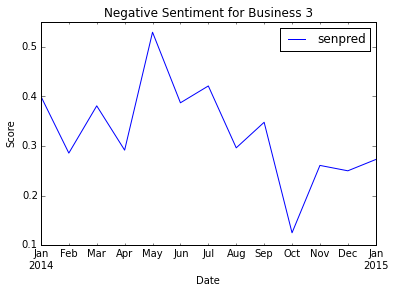

In [136]:
testplot1 = pd.DataFrame(singlerestaurant_90['senpred'].resample('M', how='mean'))
fig=testplot1.plot()
fig.set_title('Negative Sentiment for Business 3')

fig.set_xlabel('Date')
fig.set_ylabel('Score')
savefig('Bus3.png', bbox_inches='tight')

In [137]:
# find out the bad service sentences for Oct
singlerestaurant_90 = data_oneyear_90[data_oneyear_90.business_id == badservicebusiness[3]].reset_index(drop=True)
sr90text = singlerestaurant_90.text[(singlerestaurant_90['date'] >= pd.datetime(2014, 10, 1)) & 
                    (singlerestaurant_90['date'] <= pd.datetime(2014, 10, 31)) &
                    (singlerestaurant_90['senpred'] == 0)].reset_index(drop=True)
sr90text.values

array([ 'It cuts the wait time and the employees are probably less on edge (The manager seemed short-fused with some of her employees while we awkwardly watched when waiting to be seated).',
       "If there's anything that didn't impress me other than a few over-seasoned items, it would sadly have to be the service rendered to us by our server.",
       "When my waiter came around and asked how our meal was, I said it was terrible and when I glanced over my shoulder to him, I saw he had already moved on and wasn't listening at all.",
       'The wait time to get seated, we were told, was 17-22 minutes.',
       "We waited until 8:40 to be told we wouldn't be seated until 9:15 most likely, and for a party of two there was nothing they could do.",
       'HOWEVER the customer service is non-existent and we were higly offended and had a horrible experience.',
       "She apologized and asked us to go ahead and pay, SO another cashier takes us and although we didn't pay the extra charge (

In [138]:
# find out the good service sentences for May
sr90text = singlerestaurant_90.text[(singlerestaurant_90['date'] >= pd.datetime(2014, 5, 1)) & 
                    (singlerestaurant_90['date'] <= pd.datetime(2014, 5, 31)) &
                    (singlerestaurant_90['senpred'] == 1)].reset_index(drop=True)
sr90text.values

array(['Service is great, attentive and courteous.',
       'omg .. 4 days ago my friends and I went back to the bacchanal buffet at Caesars again , the food was to tasting and fesh so yummy , we love it  the service was excellen  next month we will coming back again .',
       'The seafood of both snow and Alaskan crab was awesome, service was great, shrimp was huge.',
       'step 1: go to kiosk, ignore the ppl in the other line, you dont need to worry about that yet\n\nstep 2: input number of party, get print out slip, input telephonic numeros\n\nstep 3: wait for text to recall back to aforementioned line\n\nstep 4: get in line\n\nstep 5: pay, tip on card if you wish to leave tip right then and there instead of cash\n\nstep 6: before you get into the next line, a guy will take a picture of you\n\nstep 7: wait in line, give them your receipt\n\nstep 8: the hostess will take you to your table\n\nstep9: PROFIT\n\nmust gets:\n-prime rib\n-wagyu sliders\n-their variety of drinks (not sof

In [106]:
#name of restaurant
names[names['business_id']==badservicebusiness[3]]

,Unnamed: 0,business_id,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
1265,1265,sIyHTizqAiGu12XMLX3N3g,"{u'Take-out': False, u'Accepts Credit Cards': ...","[Buffets, Restaurants]",Las Vegas,Caesars Palace Las Vegas Hotel & Casino\n3570 ...,"{u'Monday': {u'close': u'22:00', u'open': u'07...",36.115854,-115.176174,Bacchanal Buffet,[The Strip],True,3046,4,NV,business


In [ ]:
#Didn't use this one below

In [143]:
singlerestaurant_90 = data_oneyear_90[data_oneyear_90.business_id == badservicebusiness[4]]
singlerestaurant_90.set_index('date', inplace=True)
singlerestaurant_90['senpred'].resample('M', how='count') 


date
2014-01-31    16
2014-02-28    17
2014-03-31    14
2014-04-30    19
2014-05-31    19
2014-06-30    29
2014-07-31    36
2014-08-31    27
2014-09-30    26
2014-10-31    21
2014-11-30    24
2014-12-31    19
2015-01-31     5
Freq: M, Name: senpred, dtype: int64

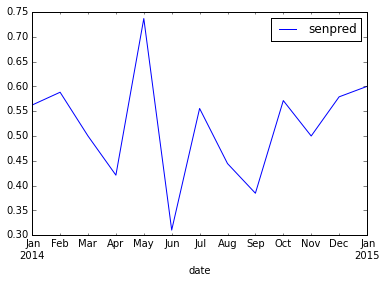

In [144]:
testplot1 = pd.DataFrame(singlerestaurant_90['senpred'].resample('M', how='mean'))
testplot1.plot()


In [145]:
#Next is index=5 but I call it "Business 4" in the plot title

In [146]:
singlerestaurant_90 = data_oneyear_90[data_oneyear_90.business_id == badservicebusiness[5]]
singlerestaurant_90.set_index('date', inplace=True)
singlerestaurant_90['senpred'].resample('M', how='count') 

date
2014-01-31    17
2014-02-28    15
2014-03-31    16
2014-04-30    24
2014-05-31    22
2014-06-30    22
2014-07-31    30
2014-08-31    20
2014-09-30    19
2014-10-31    18
2014-11-30    23
2014-12-31    30
2015-01-31     9
Freq: M, Name: senpred, dtype: int64

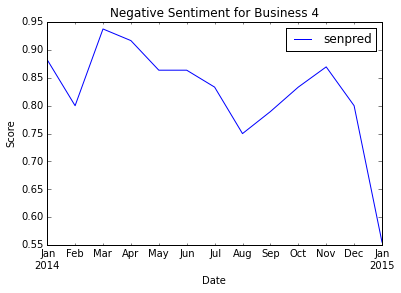

In [148]:
testplot1 = pd.DataFrame(singlerestaurant_90['senpred'].resample('M', how='mean'))
fig=testplot1.plot()
fig.set_title('Negative Sentiment for Business 4')

fig.set_xlabel('Date')
fig.set_ylabel('Score')
savefig('Bus4.png', bbox_inches='tight')

In [149]:
#find out bad sentences for month of Jan.
singlerestaurant_90 = data_oneyear_90[data_oneyear_90.business_id == badservicebusiness[5]].reset_index(drop=True)
sr90text = singlerestaurant_90.text[(singlerestaurant_90['date'] >= pd.datetime(2015,1, 1)) & 
                    (singlerestaurant_90['date'] <= pd.datetime(2015, 1, 31)) &
                    (singlerestaurant_90['senpred'] == 0)].reset_index(drop=True)
sr90text.values

array([ 'Except we got service by this waitress named Jacqui who was just plainly rude.',
       'We have been coming here regularly for past few trips but after this level of service I will never recommend anyone to visit this place again.',
       "The waitress told us that their gravy is made with sausage and bacon and a bit of maple syrup,  but we didn't think it was going to be gravy with massive chunks of sausage in it; but other than the big chunks of sausage in the gravy, we have no complaints.",
       'This place could have served poop, and still would earn a 5 star for customer service.'], dtype=object)

In [150]:
#find out good sentences for Nov.
sr90text = singlerestaurant_90.text[(singlerestaurant_90['date'] >= pd.datetime(2014, 11, 1)) & 
                    (singlerestaurant_90['date'] <= pd.datetime(2014, 11, 30)) &
                    (singlerestaurant_90['senpred'] == 1)].reset_index(drop=True)
sr90text.values

array(['Thanks again for great food and service.',
       'Food is great and service is superb!',
       'Came here on Yelp recommendations and did not disappoint, Solid breakfast, great waitress, and friendly atmosphere.',
       'Food was great and the service is amazing.',
       'Loved this joint ...well worth the 10 minute drive from the strip and a 1/3 of the price as well !',
       'Their pancakes are huge and service is excellent.',
       'Quite probably the best breakfast in LV &  definitely the best and friendliest service!',
       'My wife and I arrived at 1pm., placed our name on the wait list, Very friendly gentlemen greets us and tells us there is a 25min.',
       'Great prices, fast friendly service.',
       'Very nice man at front door managing the line, kept Ya informed of wait times etc was very efficient and friendly.',
       'He spends his money on his staff, which makes the product amazing for his guests, and they leave happy and tell the friends and then yel